In [2]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
house_data=pd.read_csv("/Users/rashmi/Desktop/ML/real_estate_prediction/boston.csv")

In [4]:
print (house_data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [5]:
house_data.shape

(506, 14)

In [6]:
house_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
house_data.info() #result shows that there is no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [8]:
#house_data['CRIM'].value_counts()

house_data['CHAS'].value_counts()

#house_data['DIS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [9]:
house_data['AGE'].value_counts()

100.0    43
96.0      4
98.2      4
95.4      4
97.9      4
87.9      4
98.8      4
94.1      3
88.0      3
21.4      3
96.2      3
98.9      3
97.3      3
32.2      3
97.0      3
92.6      3
36.6      3
97.4      3
95.6      3
76.5      3
94.5      2
91.9      2
6.6       2
77.7      2
18.5      2
21.9      2
84.1      2
94.6      2
82.6      2
93.6      2
         ..
77.8      1
78.9      1
38.1      1
66.6      1
37.2      1
89.9      1
74.8      1
61.8      1
45.6      1
78.3      1
96.8      1
95.7      1
62.2      1
73.9      1
44.4      1
97.8      1
24.8      1
68.2      1
35.9      1
64.7      1
18.8      1
46.7      1
27.6      1
97.7      1
81.3      1
47.6      1
92.7      1
13.9      1
58.4      1
40.1      1
Name: AGE, Length: 356, dtype: int64

In [10]:
house_data['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: RAD, dtype: int64

In [11]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108de9550>,
      dtype=object)

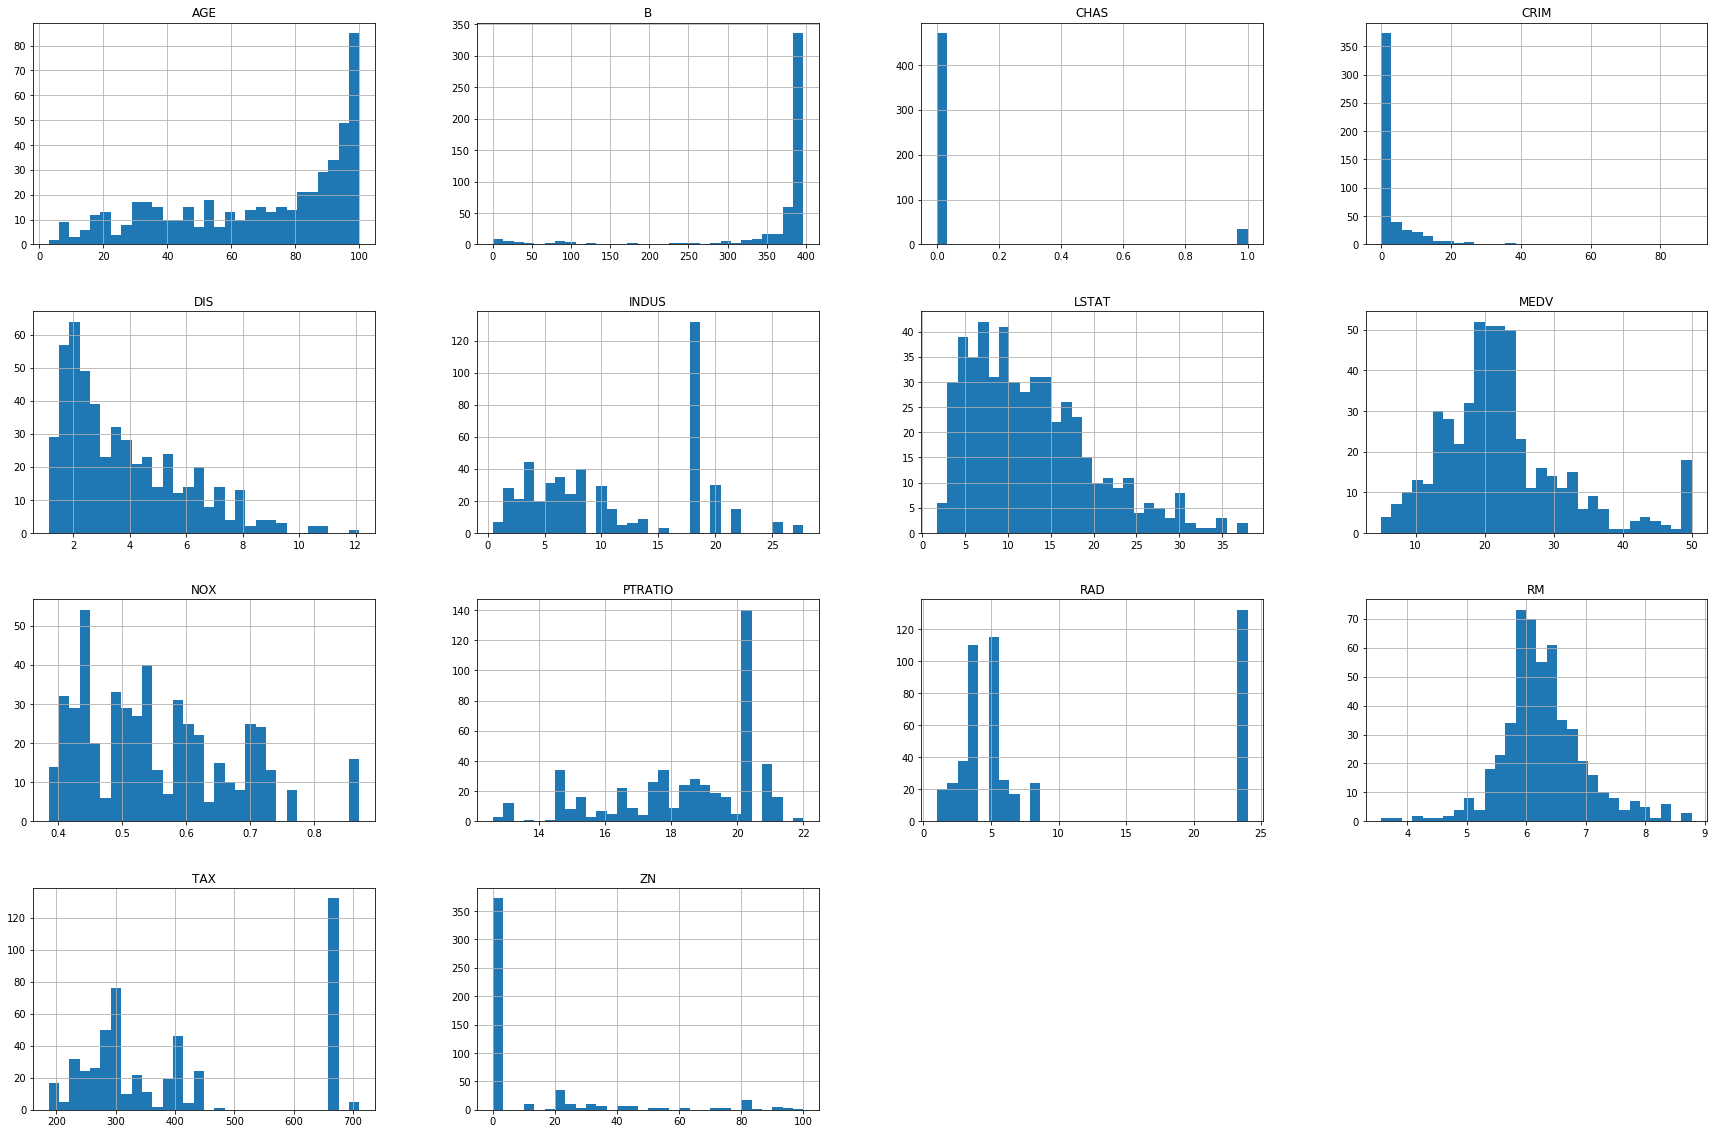

In [12]:
house_data.hist(bins=30,figsize=(30,20))


In [13]:
#split dataset into training and test data
def split_data(data,test_ratio):
    np.random.seed(42)
    shuffle_data=np.random.permutation(len(data))
    test_set_len=int(len(data)*test_ratio)
    test_indices=shuffle_data[:test_set_len]
    train_indices=shuffle_data[test_set_len:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [14]:
train_set,test_set=split_data(house_data,0.2)

In [15]:
print(len(train_set),len(test_set))

405 101


In [16]:
print (train_set)
print (test_set)

         CRIM    ZN  INDUS  CHAS     NOX     RM    AGE     DIS  RAD    TAX  \
75    0.09512   0.0  12.83     0  0.4370  6.286   45.0  4.5026    5  398.0   
477  15.02340   0.0  18.10     0  0.6140  5.304   97.3  2.1007   24  666.0   
15    0.62739   0.0   8.14     0  0.5380  5.834   56.5  4.4986    4  307.0   
332   0.03466  35.0   6.06     0  0.4379  6.031   23.3  6.6407    1  304.0   
423   7.05042   0.0  18.10     0  0.6140  6.103   85.1  2.0218   24  666.0   
19    0.72580   0.0   8.14     0  0.5380  5.727   69.5  3.7965    4  307.0   
325   0.19186   0.0   7.38     0  0.4930  6.431   14.7  5.4159    5  287.0   
335   0.03961   0.0   5.19     0  0.5150  6.037   34.5  5.9853    5  224.0   
56    0.02055  85.0   0.74     0  0.4100  6.383   35.7  9.1876    2  313.0   
437  15.17720   0.0  18.10     0  0.7400  6.152  100.0  1.9142   24  666.0   
409  14.43830   0.0  18.10     0  0.5970  6.852  100.0  1.4655   24  666.0   
334   0.03738   0.0   5.19     0  0.5150  6.310   38.5  6.4584  

In [17]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(house_data,test_size=0.2,random_state=42)

print (train_set)
print (test_set)

         CRIM    ZN  INDUS  CHAS     NOX     RM    AGE     DIS  RAD    TAX  \
477  15.02340   0.0  18.10     0  0.6140  5.304   97.3  2.1007   24  666.0   
15    0.62739   0.0   8.14     0  0.5380  5.834   56.5  4.4986    4  307.0   
332   0.03466  35.0   6.06     0  0.4379  6.031   23.3  6.6407    1  304.0   
423   7.05042   0.0  18.10     0  0.6140  6.103   85.1  2.0218   24  666.0   
19    0.72580   0.0   8.14     0  0.5380  5.727   69.5  3.7965    4  307.0   
325   0.19186   0.0   7.38     0  0.4930  6.431   14.7  5.4159    5  287.0   
335   0.03961   0.0   5.19     0  0.5150  6.037   34.5  5.9853    5  224.0   
56    0.02055  85.0   0.74     0  0.4100  6.383   35.7  9.1876    2  313.0   
437  15.17720   0.0  18.10     0  0.7400  6.152  100.0  1.9142   24  666.0   
409  14.43830   0.0  18.10     0  0.5970  6.852  100.0  1.4655   24  666.0   
334   0.03738   0.0   5.19     0  0.5150  6.310   38.5  6.4584    5  224.0   
181   0.06888   0.0   2.46     0  0.4880  6.144   62.2  2.5979  

In [18]:
print(len(train_set),len(test_set))

404 102


In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(house_data,house_data['CHAS']):
    strat_train=house_data.loc[train_index]
    strat_test=house_data.loc[test_index]

In [20]:
strat_train.shape

(404, 14)

In [21]:
strat_test['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [22]:
strat_train['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [23]:
#correlation

correlation_matrix=house_data.corr()

In [24]:
correlation_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [25]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108de9cc0>,
      dtype=object)

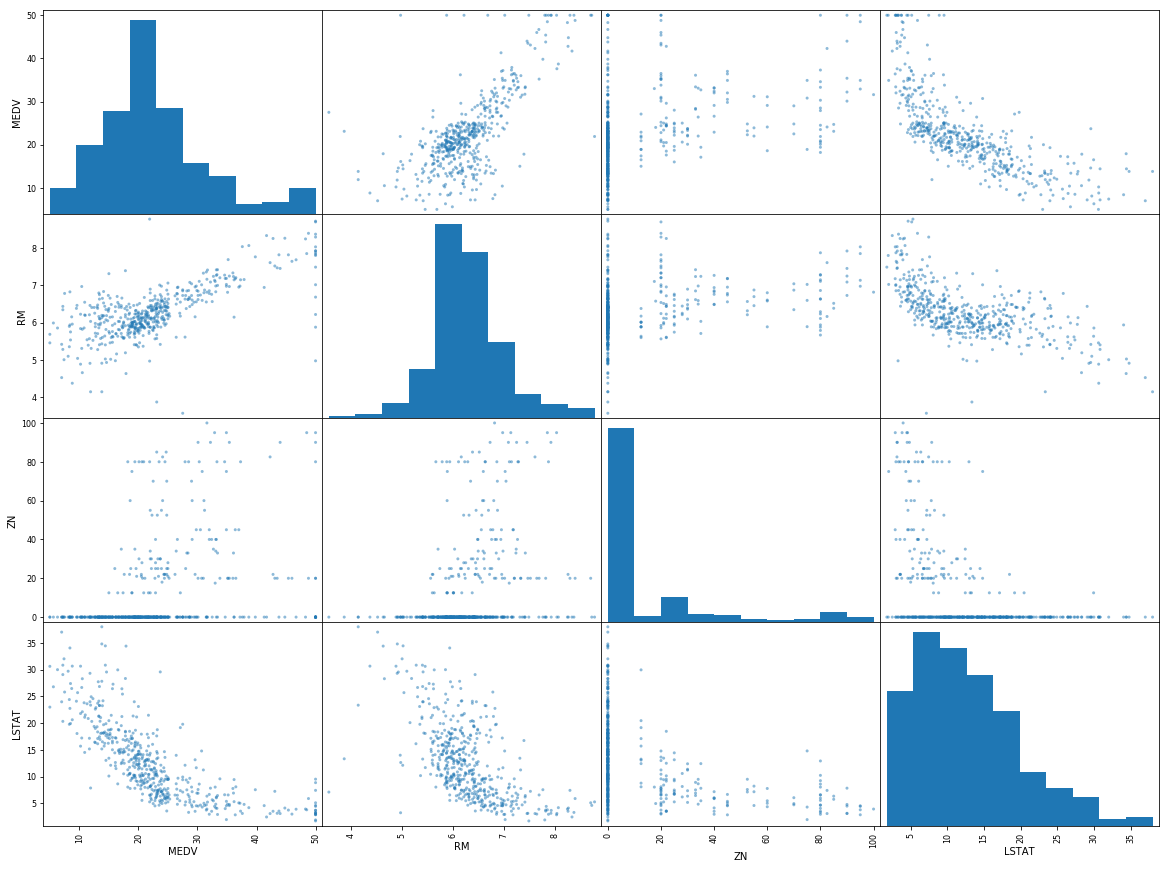

In [26]:
attr=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(house_data[attr],figsize=(20,15))

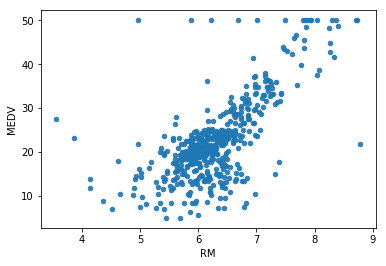

In [27]:
house_data.plot(kind="scatter",x="RM",y="MEDV",alpha=0.9)#drawing this corr matrix to check for outliers
#we can see there are variuos outliers , need to remove them
#as they can confuse my models

In [28]:
#house_data["TAXRM"]=house_data["TAX"]/house_data["RM"]

In [29]:
correlation_matrix=house_data.corr()
correlation_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [30]:
#house_data.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.9)

In [31]:
print(strat_train.shape)

house_data=strat_train.drop("MEDV",axis=1)
house_labels=strat_train["MEDV"].copy()

house_data.shape

(404, 14)


(404, 13)

# handle missing attributes

In [32]:
#various steps
#remove missing data points
df=house_data.dropna(subset=["RM"])
df.shape

#remove whole attribute
#set the value to some value=0,mean,medium

(404, 13)

In [33]:
#remove whole attribute
house_data.drop("RM",axis=1).shape # original dataframe remain unchanged

(404, 12)

In [34]:
house_data.shape # original dataframe remain unchanged

(404, 13)

In [35]:
house_data["RM"].fillna(house_data["RM"].median,inplace=True)

In [36]:
#house_data["RM"]

In [37]:
house_data.shape# original dataframe remain unchanged

(404, 13)

In [38]:
house=house_data.copy()# we did this bcoz we need to fit imputer on training set and not on the whole data
house.shape

(404, 13)

In [39]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(house)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [40]:
imputer.statistics_.shape# computed medians for all 15 columns

(13,)

In [41]:

x=imputer.transform(house)

In [42]:
tr_house=pd.DataFrame(x,columns=house.columns)

In [43]:
tr_house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [44]:
#create a pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler # for feature scaling(standarization)

pipe_house=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),#can add as many parameters as i want
    ('std_scaler',StandardScaler()),
])

In [45]:
house_num_tr=pipe_house.fit_transform(tr_house)#fitting pipeline on training data

In [46]:
house_num_tr.shape # it is a numpy array

(404, 13)

# Select model for prediction 

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

model = RandomForestRegressor()
#model=LinearRegression()
#model=DecisionTreeRegressor()
model.fit(house_num_tr,house_labels)


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [48]:
data1=house_data.iloc[:5]

In [49]:
labels=house_labels.iloc[:5]

In [50]:
trans_data=pipe_house.transform(data1)

In [51]:
model.predict(trans_data)

array([23.16, 25.54, 15.53, 23.38, 23.94])

In [52]:
list(labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [53]:
#calculate mean squared error
#evaluating model

from sklearn.metrics import mean_squared_error
predictions=model.predict(house_num_tr)
mse=mean_squared_error(house_labels,predictions)
rmse=np.sqrt(mse)

In [54]:
rmse

1.365725064020958

In [55]:
mse# its a heavy error so we'll discard this modelfor linear regression
# for decision tree mse is 0 , means its has overfitted the model(model has learned the noice)

1.8652049504950494

In [56]:
#discard both of the above models

# using better evaluation technique- cross validation

In [57]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,house_num_tr,house_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [58]:
rmse_scores


array([2.92470261, 3.05977123, 4.38914959, 2.79285893, 3.58441278,
       2.9562121 , 5.58689292, 3.32974586, 3.24691777, 3.94378308])

In [59]:
def print_scores(score):
    print("Scores:",score)
    print("Mean:",score.mean())
    print("Standard deviation:",score.std())
    

In [60]:
print_scores(rmse_scores)

Scores: [2.92470261 3.05977123 4.38914959 2.79285893 3.58441278 2.9562121
 5.58689292 3.32974586 3.24691777 3.94378308]
Mean: 3.5814446881725965
Standard deviation: 0.8183523045368547


In [61]:

from joblib import dump, load
dump(model, 'My_house_predictor.joblib') 

['My_house_predictor.joblib']

In [62]:
#test model on test data
x_test=strat_test.drop("MEDV",axis=1)
y_test=strat_test["MEDV"].copy()
x_test_tras=pipe_house.transform(x_test)
final_pred=model.predict(x_test_tras)
final_mse=mean_squared_error(y_test,final_pred)
final_rmse=np.sqrt(mse)

print(final_pred,list(y_test))


[22.67 10.22 24.74 20.87 18.69 14.51 18.5  15.28 33.07 39.49 20.15  9.2
 24.49 26.   19.19 10.51 31.29 13.2  23.72 18.   19.64 17.73 13.09 22.14
 17.86 32.07 16.21 34.37  8.56 34.34 21.18 21.97 22.79 10.17 20.54 10.8
 42.25 24.31 23.69 42.47 24.57 28.86 19.71 20.39 19.98 32.43 44.2  19.49
 19.37 21.48 22.45 14.34 20.94 14.89 23.44 31.81 39.82 28.75 18.77 20.75
 46.37 10.12 18.23 25.97 14.96 32.95 17.36 17.13 18.69 35.64 28.71 23.36
 22.31 21.24 35.01 13.26 16.48 19.62 20.41 21.1  22.53 24.81 14.49 23.4
 21.38 21.6  11.64 22.19 25.39 23.85 19.21 28.04  6.75 25.7  17.27 30.03
 19.82 30.19 14.78 27.52 20.93 19.83] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50.0, 7.2, 17.2, 36.2

In [63]:
final_rmse

1.365725064020958

In [66]:
x_test_tras[0][0]

-0.4422892678796334

In [65]:
x_test_tras.dtype

dtype('float64')